Calculate mean and std of images dataset.

Source: https://discuss.pytorch.org/t/about-normalization-using-pre-trained-vgg16-networks/23560/6

In [33]:
from os import listdir
from os.path import isfile, join

import pandas as pd
from loader import ImageDS_Stats
import torch
import torch.utils.data as D
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tqdm import tqdm_notebook

from loader import ImageDS

# Size of Images

In [29]:
aptosfiles = [join('/storage/aptosplus/aptos', f) for f in listdir('/storage/aptosplus/aptos') if isfile(join('/storage/aptosplus/aptos', f))]
eyepacsfiles = [join('/storage/aptosplus/eyepacs', f) for f in listdir('/storage/aptosplus/eyepacs') if isfile(join('/storage/aptosplus/eyepacs', f))]

In [ ]:
allfiles = aptosfiles + eyepacsfiles

In [ ]:
size_counter = Counter()

for file in allfiles:
    image = Image.open(file)
    h, w = image.size
    
    if h != 512 or w != 512:
        print(f'size is h{h} w{w} - {file}')

    size_counter.update([f'h{h}_w{w}'])
    
print(size_counter)

# Check DataLoader

In [30]:
SEED = 77
df_train = pd.read_csv('/storage/aptosplus/trainLabels_aug.csv')
df_test = pd.read_csv('/storage/aptos2019-blindness-detection/test.csv')

x = df_train[['id_code', 'ds']]
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=SEED)

(142656, 2) (142656,) (1151, 2) (1151,)


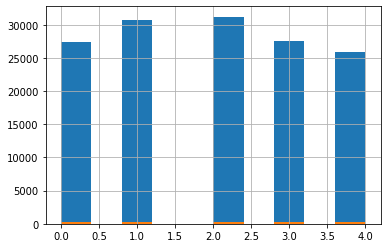

In [31]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.008,
                                                      stratify=y, random_state=SEED)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()

In [32]:
batch_size = 16
# pytorch training dataset & loader
ds = ImageDS(train_x, train_y)
loader = D.DataLoader(ds, batch_size=batch_size, shuffle=True, num_workers=8)

# pytorch cross-validation dataset & loader
ds_val = ImageDS(valid_x, valid_y)
val_loader = D.DataLoader(ds_val, batch_size=batch_size, shuffle=True, num_workers=8)

In [11]:
for (x,y) in ds:
    print(y)

0
2
1
0
3
0
0
2
1
3
1
2
0
0
3
1
4
2
2
1
1
1
0
0
4
3
2
2
2
3
1
2
1
3
2
4
0
2
2
4
2
2
4
1
2
0
1
1
4
0
3
2
0
4
4
1
3
4
4
0
3
1
2
3
3
0
3
0
2
2
4
0
1
4
3
2
2
1
1
2
0
0
2
2
0
2
4
4
2
1
2
4
0
0
1
2
4
0
3
1
2
4
0
2
2
3
3
0
0
3
0
0
4
2
0
3
2
0
2
2
3
3
0
3
0
1
0
4
3
3
4
0
2
2
4
2
1
0
2
2
2
2
2
1
3
4
0
3
4
1
3
1
2
0
4
1
1
3
2
1
1
1
1
1
4
4
0
0
1
3
2
2
0
4
0
2
2
3
1
2
4
3
3
4
4
1
4
2
2
0
3
4
3
0
2
3
2
2
4
2
4
0
4
1
0
2
4
3
2
0
1
3
0
3
4
0
4
0
0
0
1
4
1
4
1
4
2
1
2
3
1
2
2
1
0
1
0
3
3
0
3
3
2
0
0
3
0
1
3
0
3
2
3
3
2
3
1
1
0
4
2
2
0
3
4
1
2
2
3
2
3
4
4
3
4
0
1
1
3
1
0
3
0
4
0
2
3
3
2
3
2
1
4
3
2
4
3
0
1
1
2
0
4
3
3
1
1
2
1
3
1
4
0
3
4
3
2
2
2
0
2
1
1
2
4
1
3
1
4
3
4
3
1
4
3
2
4
3
0
4
1
3
2
3
1
0
0
0
3
2
3
0
1
0
0
1
2
0
3
0
4
1
4
1
1
4
4
2
0
3
3
2
1
4
2
4
2
3
3
1
3
0
0
1
0
4
4
2
1
2
2
2
1
2
0
4
1
3
3
1
2
0
0
0
0
0
0
0
2
0
1
4
4
3
3
4
0
2
4
2
1
3
1
1
2
1
0
1
3
2
1
0
3
0
1
3
2
4
4
3
1
4
1
0
0
1
3
0
3
0
1
4
0
1
3
2
1
4
3
0
1
2
4
2
3
2
4
2
1
0
0
3
0
0
3
4
2
4
3
0
0
0
3
1
0
4
1
2
3
4
2
4
1
4
0
3
2
0
3
2


KeyboardInterrupt: 

# Dataset mean and std

In [2]:
df = pd.read_csv('/storage/aptosplus/trainLabels_aug.csv')
df.head()

,id_code,diagnosis,ds
0,000c1434d8d7,2,aptos
1,001639a390f0,4,aptos
2,0024cdab0c1e,1,aptos
3,002c21358ce6,0,aptos
4,005b95c28852,0,aptos


In [3]:
df.tail()

,id_code,diagnosis,ds
143802,44349_right_a5,1,eyepacs
143803,44349_right_a6,1,eyepacs
143804,44349_right_a7,1,eyepacs
143805,44349_right_a8,1,eyepacs
143806,44349_right_a9,1,eyepacs


In [4]:
dataset = ImageDS_Stats(df)

In [5]:
loader = D.DataLoader(
    dataset,
    batch_size=10,
    num_workers=1,
    shuffle=False
)

mean = 0.
std = 0.
nb_samples = 0.

for data, _ in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

In [6]:
print(mean)

tensor([794.9223, 685.4205, 605.1915])


In [7]:
print(std)

tensor([58.8981, 57.5124, 57.9897])
